In [1]:
from model import NeuralNetwork
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from persistable_model import PresistableModel


In [2]:
# useiden eri mnist datasettien jälkeen päädyin tähän pikkelöityyn
# https://www.kaggle.com/datasets/pablotab/mnistpklgz
from utilities import vectorize_label


with gzip.open('../data/mnist.pkl.gz', 'rb') as f:
    train_set, val_set, test_set = pickle.load(f, encoding='latin1')

X_train = [np.reshape(x, (784, 1)) for x in train_set[0]]
y_train = [vectorize_label(y) for y in train_set[1]]
X_val = [np.reshape(x, (784, 1)) for x in val_set[0]]
y_val = val_set[1]
X_test = [np.reshape(x, (784, 1)) for x in test_set[0]]
y_test = test_set[1]

In [3]:
def evalulate_model(m):
    results = []
    for x, y in zip(X_test, y_test):
        prediction, _, __ = m.predict(x)
        results.append(prediction == y)
    
    correct_predictions_count = np.array(results).sum()
    accuracy =  correct_predictions_count / len(results)
    
    print("Predicted {}/{} correct".format(correct_predictions_count, len(results)))
    print("Accuracy: {}".format(accuracy))

In [8]:
model = NeuralNetwork([784, 30, 16, 10])
model.fit(X_train, y_train, X_val, y_val, 30, 1.5, 10)


Epoch 0 done
Predicted 6866/10000
Epoch 1 done
Predicted 6787/10000
Epoch 2 done
Predicted 6963/10000
Epoch 3 done
Predicted 7037/10000
Epoch 4 done
Predicted 7149/10000
Epoch 5 done
Predicted 7239/10000
Epoch 6 done
Predicted 7286/10000
Epoch 7 done
Predicted 7437/10000
Epoch 8 done
Predicted 7472/10000
Epoch 9 done
Predicted 7369/10000
Epoch 10 done
Predicted 7529/10000
Epoch 11 done
Predicted 7393/10000
Epoch 12 done
Predicted 7473/10000
Epoch 13 done
Predicted 7384/10000
Epoch 14 done
Predicted 7507/10000
Epoch 15 done
Predicted 7345/10000
Epoch 16 done
Predicted 7383/10000
Epoch 17 done
Predicted 7343/10000
Epoch 18 done
Predicted 7377/10000
Epoch 19 done
Predicted 7255/10000
Epoch 20 done
Predicted 7364/10000
Epoch 21 done
Predicted 7207/10000
Epoch 22 done
Predicted 7241/10000
Epoch 23 done
Predicted 6923/10000
Epoch 24 done
Predicted 7240/10000
Epoch 25 done
Predicted 7194/10000
Epoch 26 done
Predicted 7026/10000
Epoch 27 done
Predicted 7210/10000
Epoch 28 done
Predicted 7115/1

In [ ]:
# PresistableModel(model).save('baseline-784-30-16-10')
# Treenaaminen on hidasta > pikkelöidään neuroverkon datan ja luodaan uudelleen.
# model = PresistableModel.load('baseline')

evalulate_model(model)

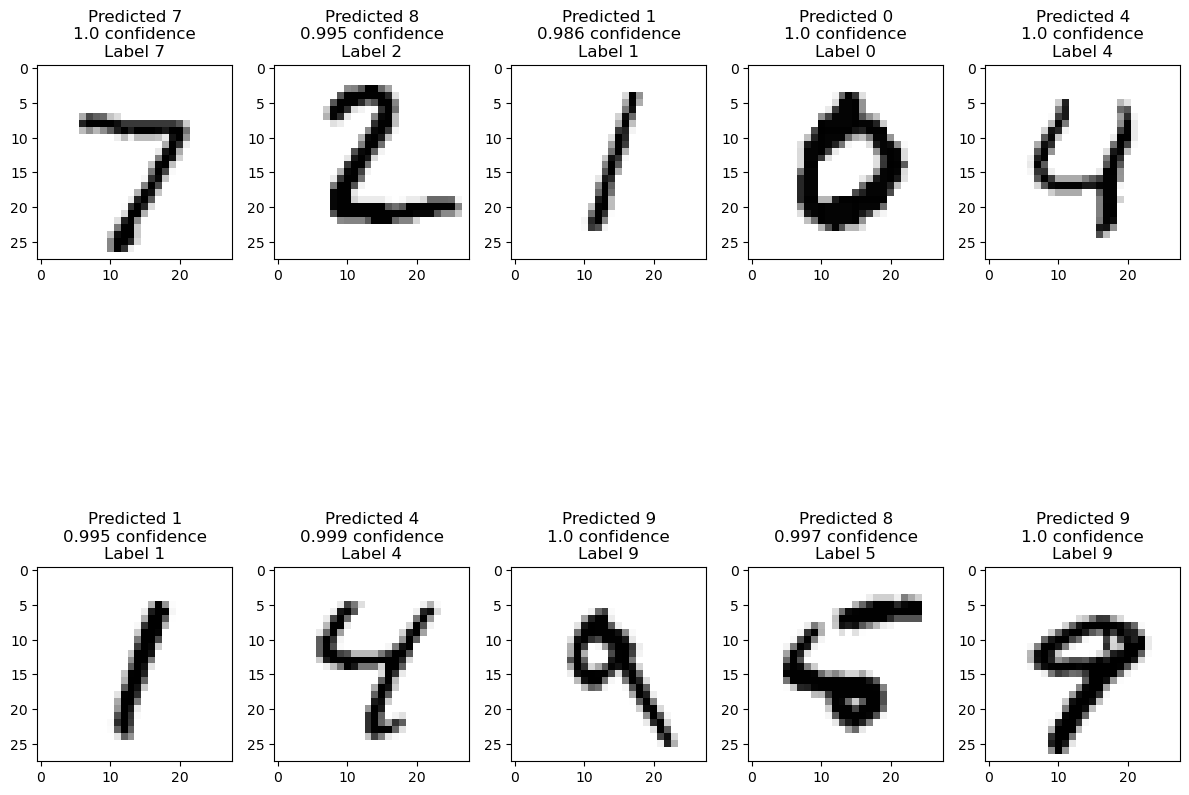

In [ ]:
n_prediction = 10
fig, axes = plt.subplots(2, 5, figsize=(12, 12))

def image_vector_to_matrix(v):
    n = int(np.sqrt(v.size))
    return v.reshape(n, n)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(image_vector_to_matrix(X_test[i]), cmap='gray_r')
    prediction, confidence, y = model.predict(X_test[i])
    ax.set_title('Predicted {}\n{} confidence\nLabel {}'.format(prediction, confidence, y_test[i]))

plt.tight_layout()
plt.show()
